In [60]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

In [61]:
df_mpd = pd.read_pickle('../data/mean_pairwise_distance.pkl')
df_mpd['mean_pairwise_distance'] = df_mpd['mean_pairwise_distance'].apply(lambda x: x.data)
df_mpd

,mean_pairwise_distance
0,0.084059
1,0.084059
2,0.084059
3,0.084059
4,0.084059
...,...
1409,0.001158
1410,0.001156
1411,0.001156
1412,0.001156


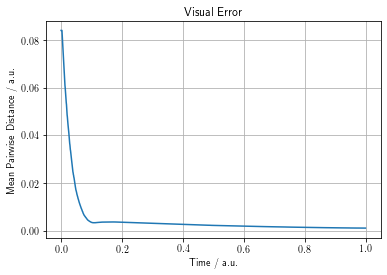

In [62]:
plt.plot(df_mpd.index/len(df_mpd), df_mpd.mean_pairwise_distance)
plt.title('Visual Error')
plt.xlabel('Time / a.u.')
plt.ylabel('Mean Pairwise Distance / a.u.')
plt.grid()
# plt.show()
plt.savefig('visual_error.pdf')

# fig = px.line(df_mpd, x=df_mpd.index, y='mean_pairwise_distance')
# fig.show()

In [63]:
df_fb = pd.read_pickle('../data/h_rcom_vs_feedback.pkl')

# compute euclidean distance on trocar position error
df_fb['p_trocar_error_euclidean_distance'] = df_fb['rcomFeedback'].apply(
    lambda x: 
        np.linalg.norm(np.array([x.errors.p_trocar.position.x, x.errors.p_trocar.position.y, x.errors.p_trocar.position.z])*1.e3)
)

print(df_fb['rcomFeedback'][0])
df_fb

states: 
  task: 
    values: [0.00014353747789242228, -0.0003610815974219938, 0.00013028974159557115, -0.004276015105908562, 0.019463707049866413, -0.015471725239235897]
    is_velocity: True
  p_trocar: 
    position: 
      x: 0.8398300400287818
      y: 0.17389982026532977
      z: 0.22720820005031309
    is_empty: False
errors: 
  task: 
    values: [-0.00014353747789242228, 0.0003610815974219938, -0.00013028974159557115, 0.01947851215724508, -0.03766775500502748, -0.02779640440906113]
    is_velocity: True
  p_trocar: 
    position: 
      x: 2.2593400970438715e-05
      y: -4.128394828964432e-05
      z: -3.8495414428435515e-05
    is_empty: False


,rcomFeedback,p_trocar_error_euclidean_distance
0,states: \n task: \n values: [0.00014353747...,0.060801
1,states: \n task: \n values: [0.00034859212...,0.064853
2,states: \n task: \n values: [0.00057976984...,0.073503
3,states: \n task: \n values: [0.00062368516...,0.085636
4,states: \n task: \n values: [0.00066827935...,0.101130
...,...,...
2964,states: \n task: \n values: [-6.7584733165...,0.027986
2965,states: \n task: \n values: [-6.6375041207...,0.027921
2966,states: \n task: \n values: [-6.6253211661...,0.027865
2967,states: \n task: \n values: [-6.6180401592...,0.027867


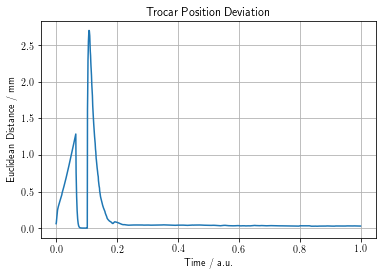

In [64]:
plt.plot(df_fb.index/len(df_fb), df_fb.p_trocar_error_euclidean_distance)
plt.title('Trocar Position Deviation')
plt.xlabel('Time / a.u.')
plt.ylabel('Euclidean Distance / mm')
plt.grid()
# plt.show()
plt.savefig('trocar_position_deviation.pdf')

# fig = px.line(df_fb, x=df_fb.index, y='p_trocar_error_eucledian_norm')
# fig.show()

In [65]:
df_rcom_state = pd.read_pickle('../data/rcom_state.pkl')

df_rcom_state['tip_error_euclidean_distance'] = df_rcom_state['rcom'].apply(lambda x:
    np.sqrt(
        (x.task.values[0] - df_rcom_state['rcom'][0].task.values[0])**2 +
        (x.task.values[1] - df_rcom_state['rcom'][0].task.values[1])**2 +
        (x.task.values[2] - df_rcom_state['rcom'][0].task.values[2])**2
    )*1.e3
)

# df_rcom_state['x'] = df_rcom_state['rcom'].apply(lambda x: abs(x.task.values[0] - df_rcom_state['rcom'][0].task.values[0])*1.e3)
# df_rcom_state['y'] = df_rcom_state['rcom'].apply(lambda x: abs(x.task.values[1] - df_rcom_state['rcom'][0].task.values[1])*1.e3)
# df_rcom_state['z'] = df_rcom_state['rcom'].apply(lambda x: abs(x.task.values[2] - df_rcom_state['rcom'][0].task.values[2])*1.e3)

# delete column
df_rcom_state = df_rcom_state.drop(['rcom'], axis=1)
df_rcom_state

,tip_error_euclidean_distance
0,0.000000e+00
1,0.000000e+00
2,1.185394e-12
3,8.092071e-13
4,8.092071e-13
...,...
10294,1.241629e+01
10295,1.241807e+01
10296,1.241985e+01
10297,1.242162e+01


No handles with labels found to put in legend.


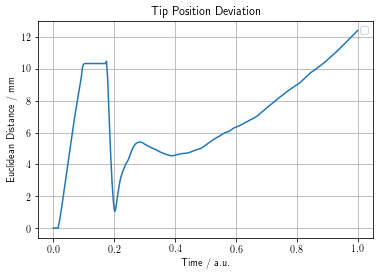

In [66]:
plt.plot(df_rcom_state.index/len(df_rcom_state), df_rcom_state.tip_error_euclidean_distance)

plt.title('Tip Position Deviation')
plt.xlabel('Time / a.u.')
plt.ylabel('Euclidean Distance / mm')
plt.grid()
plt.legend()
# plt.show()
plt.savefig('tip_position_deviation.pdf')


# fig = go.Figure()

# for key, col in df_rcom_state.iteritems():
#     fig.add_trace(
#         go.Scatter(x=col.index, y=df_rcom_state[key], mode='lines', name=key)
#     )

# fig.show()

In [67]:
df_twist = pd.read_pickle('../data/twist.pkl')

# split df
df_twist['linear.x']  = df_twist['Twist'].apply(lambda x: x.linear.x)
df_twist['linear.y']  = df_twist['Twist'].apply(lambda x: x.linear.y)
df_twist['linear.z']  = df_twist['Twist'].apply(lambda x: x.linear.z)
df_twist['angular.x'] = df_twist['Twist'].apply(lambda x: x.angular.x)
df_twist['angular.y'] = df_twist['Twist'].apply(lambda x: x.angular.y)
df_twist['angular.z'] = df_twist['Twist'].apply(lambda x: x.angular.z)

# delete column
df_twist = df_twist.drop(['Twist'], axis=1)
df_twist

,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,0.067049,-0.054025,-0.050308,0.073515,0.141450,-1.470542
1,0.067049,-0.054025,-0.050308,0.073515,0.141450,-1.470542
2,0.067049,-0.054025,-0.050308,0.073515,0.141450,-1.470542
3,0.066364,-0.052438,-0.049099,0.072352,0.139647,-1.441461
4,0.064993,-0.050083,-0.049689,0.064898,0.135149,-1.406079
...,...,...,...,...,...,...
1407,-0.002096,0.000497,-0.001395,-0.003515,-0.002704,-0.000025
1408,-0.002092,0.000500,-0.001349,-0.003377,-0.002649,-0.000076
1409,-0.002092,0.000500,-0.001349,-0.003377,-0.002649,-0.000076
1410,-0.002092,0.000500,-0.001349,-0.003377,-0.002649,-0.000076


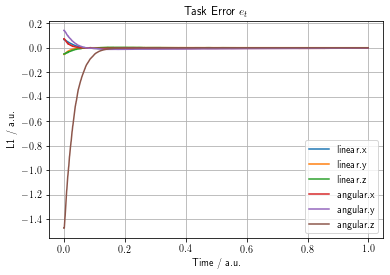

In [68]:
for key, col in df_twist.iteritems():
    plt.plot(col.index/len(col), df_twist[key], label=key)

plt.title('Task Error $e_t$')
plt.xlabel('Time / a.u.')
plt.ylabel('L1 / a.u.')
plt.grid()
plt.legend()
# plt.show()
plt.savefig('task_error.pdf')

# fig = go.Figure()

# for key, col in df_twist.iteritems():
#     fig.add_trace(
#         go.Scatter(x=col.index, y=df_twist[key], mode='lines', name=key)
#     )

# fig.update_layout(title=r'$\text{Task Error}\,\,e_\text{t}$', xaxis_title='Iteration / #')

# fig.write_image('test.pdf')